In [1]:
"""
(*)~---------------------------------------------------------------------------
author: p.wagner@unsw.edu.au / p.wagner@bhvi.org

find random sequence of LEDs (uneaven number) for accuracy testing 
- optional one or two sided (interconnected, each with every LED)
---------------------------------------------------------------------------~(*)
"""

import numpy as np
import pandas as pd 
import random 
import matplotlib.pyplot as plt
import os

%matplotlib inline 

1
    1   2   3   4   5   6   7   8   9   10  11  12  13
1  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
2  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
3  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
4  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
5  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
6  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
7  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
8  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
9  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
10 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
11 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
12 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
13 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
[13, 2, 10, 6, 7, 8, 3, 4, 6, 2, 7, 10, 1, 6, 3, 7, 4, 8, 1, 3, 10, 5, 3, 13, 6, 8, 10, 12, 6, 9, 11, 5, 9, 4, 1, 2, 5, 4, 10, 13, 1, 5, 12, 2, 8, 5, 13, 9, 3, 12, 8, 13, 4, 2, 11, 10, 9, 7, 1, 11, 4, 12, 11, 8, 9, 2, 3, 11, 7, 

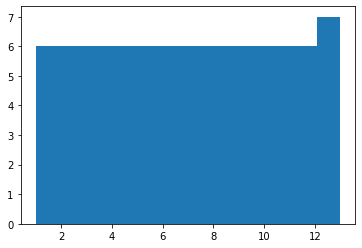

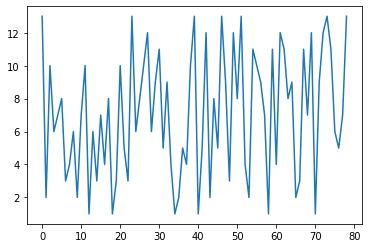

In [11]:
# creat matrix of n * n with missing n(i) element in row n(i)
# uneven numbers only 
n = 13
# print(d)
mat_element_list = list(range(1,n+1))
d = pd.DataFrame(0, index=mat_element_list, columns=mat_element_list)
counter = 0

while np.any(~np.isnan(d.loc[:,:])):
    counter = counter +1
    # delete sefl referencing elements 
    for column in d.columns:
        d.loc[:, column] = column
        d.loc[column, column] = np.nan
        
    start_row =n  # for random target at 3m former control target 
    led_sequence =  int(start_row) 
#     print(led_sequence)

    # while none nan values in list for random selection 
    while np.any(~np.isnan(d.loc[start_row,:])): 
        list_elements = list(d.loc[start_row, ~np.isnan(d.loc[start_row,:])])
        element = random.choice(list_elements)
        # index of elemement == int (element) 
        # otherwise (d.index[d.loc[start_row, : ]==element].tolist())
        # set d[ start_row , element] to nan to register as processes  
        d.loc[start_row, int(element)] = np.nan
        # set d[ start_row , element] to nan to register that the reverse doesn't need to be processed  
        d.loc[int(element), start_row] = np.nan
        # record element as sequence for LEDs 
        led_sequence = np.append(led_sequence, element) 
        start_row = int(element)

led_sequence = led_sequence.astype(int).tolist()
# controll values 
print(counter)
print(d)
print((led_sequence))
print("size of array: ", len(led_sequence)) 

# hist should be even aproximmately (n-1)/2

plt.hist(led_sequence, n)
plt.show()

plt.plot(led_sequence)
plt.show()

In [12]:
print(os.getcwd())

C:\Users\p.wagner


In [4]:
type(led_sequence[1])      

int